## Cafe walkthrough
---

This notebook walks through on how to use `cafe` and its two main modules: `data_transform` and `ml`.

The data used in this example are purely for demonstration purposes. The labels were generated randomly.

### Import all necessary libraries
---

In [1]:
from cafe.data_transform import read_fasta, combine_seq, saar, convert_to_values
from cafe.ml import classify

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


### Data loading and transformation
---

1. Read in the FASTA files using the `read_fasta()` function which returns a `pandas` dataframe so any `pandas`-related functions can be used.

In [2]:
# Load the FASTA files into a pandas dataframe
hc_df = read_fasta('data/D12VH.66.fasta')
lc_df = read_fasta('data/D12VL.20.fasta')

**The user should make sure all the sequences are aligned as there is no function at the moment to perform sequence alignment.**

In [3]:
# Glimpse the first 5 rows
hc_df.head()

,ID,Sequence,Sequence Length
0,D12HGermline,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...,115
1,D12H01,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...,115
2,D12H02,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...,115
3,D12H03,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...,115
4,D12H04,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...,115


In [4]:
lc_df.head()

,ID,Sequence,Sequence Length
0,D12L01,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,107
1,D12L02,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,107
2,D12L03,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,107
3,D12L04,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,107
4,D12L05,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,107


2. Use the `combine_seq()` function to get the different combinations of the entire amino acid sequence.

    `combine_seq()` takes two `pandas` dataframes as its arguments.

    *This function is not necessary if the entire sequence is known.*

In [5]:
comb_df = combine_seq(hc_df['Sequence'], lc_df['Sequence']) # Specify the column for each dataframe
comb_df.head()

,Combined Sequence
0,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...
1,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...
2,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...
3,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...
4,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...


3. Here, we perform single amino acid representation transformation where the `saar()` function splits every amino acid in the combined sequence into their own columns, creating a high-dimensional dataset.

    **It is important to specify the column of the dataframe when using `saar()`.**

In [6]:
saar_df = saar(comb_df['Combined Sequence']) # Specify the column
saar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,Q,V,Q,L,V,E,S,G,G,G,...,F,G,G,G,T,K,V,E,I,K
1,Q,V,Q,L,V,E,S,G,G,G,...,F,G,G,G,T,K,V,E,I,K
2,Q,V,Q,L,V,E,S,G,G,G,...,F,G,G,G,T,K,V,E,I,K
3,Q,V,Q,L,V,E,S,G,G,G,...,F,G,G,G,T,K,V,E,I,K
4,Q,V,Q,L,V,E,S,G,G,G,...,F,G,G,G,T,K,V,E,I,K


4. Next, we can use the `convert_to_values()` function to create several dataframes (in this case, 7) that each have the amino acids replaced with the values from values.xlsx as well as its associated sheet names.

    These dataframes represent our features, i.e., the first dataframe represents AA2INT features and so on.

    **The user is responsible for creating this Excel file as it is assumed that the user is interested in testing out certain antibody properties (either from literature or from the lab).**

    **Additionally, please follow the format of how the Excel file is structured in the data folder as the user may experience errors if he/she does not do so.**

In [7]:
feature_list, properties = convert_to_values(saar_df, 'data/values.xlsx')
print('There are {} dataframes.'.format(len(feature_list)))
print(properties)

There are 7 dataframes.
['AA2INT', 'BIOPHYSICAL', 'HYDROPHOBICITY', 'ISOELECTRIC', 'SASA', 'VOLUME', 'WEIGHT']


Here, `feature_list[0]` corresponds to AA2INT from `properties`, `feature_list[1]` corresponds to BIOPHYSICAL, and so on.

In [8]:
aa2int_df = feature_list[0]
aa2int_df.head()

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,6,20,6,11,20,7,16,8,8,8,...,14,8,8,8,17,12,20,7,10,12
1,6,20,6,11,20,7,16,8,8,8,...,14,8,8,8,17,12,20,7,10,12
2,6,20,6,11,20,7,16,8,8,8,...,14,8,8,8,17,12,20,7,10,12
3,6,20,6,11,20,7,16,8,8,8,...,14,8,8,8,17,12,20,7,10,12
4,6,20,6,11,20,7,16,8,8,8,...,14,8,8,8,17,12,20,7,10,12


In [9]:
# Check the dimensions of the dataframe (rows, columns)
aa2int_df.shape

(1340, 222)

In [10]:
hydrophobicity_df = feature_list[2]
hydrophobicity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,-3.5,4.2,-3.5,3.8,4.2,-3.5,-0.8,-0.4,-0.4,-0.4,...,2.8,-0.4,-0.4,-0.4,-0.7,-3.9,4.2,-3.5,3.8,-3.9
1,-3.5,4.2,-3.5,3.8,4.2,-3.5,-0.8,-0.4,-0.4,-0.4,...,2.8,-0.4,-0.4,-0.4,-0.7,-3.9,4.2,-3.5,3.8,-3.9
2,-3.5,4.2,-3.5,3.8,4.2,-3.5,-0.8,-0.4,-0.4,-0.4,...,2.8,-0.4,-0.4,-0.4,-0.7,-3.9,4.2,-3.5,3.8,-3.9
3,-3.5,4.2,-3.5,3.8,4.2,-3.5,-0.8,-0.4,-0.4,-0.4,...,2.8,-0.4,-0.4,-0.4,-0.7,-3.9,4.2,-3.5,3.8,-3.9
4,-3.5,4.2,-3.5,3.8,4.2,-3.5,-0.8,-0.4,-0.4,-0.4,...,2.8,-0.4,-0.4,-0.4,-0.7,-3.9,4.2,-3.5,3.8,-3.9


In [11]:
hydrophobicity_df.shape

(1340, 222)

Now, read in the Excel file of the labels.

**Again, the user is responsible for having this Excel file beforehand.**

In [12]:
labels_df = pd.read_excel('data/fake_labels.xlsx')
labels_df.head()

,Labels
0,0
1,0
2,0
3,0
4,0


**MAKE SURE THAT `labels_df` AND THE DATAFRAMES IN `df_list` HAVE THE SAME NUMBER OF ROWS.**

In [13]:
# Check the dimensions of the labels dataframe.
labels_df.shape

(1340, 1)

### Data visualization
---

We can plot the labels to see the distribution.

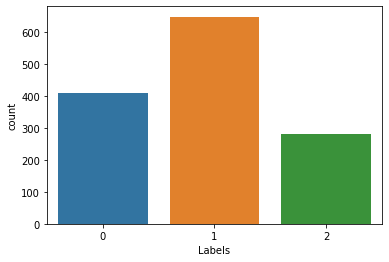

In [14]:
sns.countplot(labels_df['Labels'])
plt.show()
# plt.savefig('class_count.png', dpi = 1200) # For saving the plot

### Classification
---

5. Now, we can run the `classify()` function to perform machine learning classification.
    
    First:

    `classify()` tests 5 machine learning models with their default parameters:
    - [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    - [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)
    - [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
    - [Extremely Randomized Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)
    - [Logistic Regression with Stochastic Gradient Descent learning](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

    Specifying `model = 'all'` will test all 5 models and selects the one with the highest score based on the `scoring` argument.
    
    Here is a [link](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) for `scoring` callables.

    The user can also specify a specific model he/she wants to try.

    For:
        - Random Forest, specify `model = 'rf'`
        - Gradient Boosting, specify `model = 'gbm'`
        - Decision Tree, specify `model = 'dt'`
        - Extremely Randomized Tree, specify `model = 'et'`
        - Logistic Regression with SGD, specify `model = 'log_sgd'`
        
   Second:
   
      The user can also specify the resampling method if the data is imbalanced by setting `resample_method` to either [`smote_tomek`](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html#tomek-links) or [`smote_enn`](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html#edited-data-set-using-nearest-neighbours) (the default is `None`).
   
   Third:
    
   `classify()` will return 
    - the tuned classifier (using [random search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))
    - a report showing the precision, recall, and f1-score for each class
    - [Matthew Correlation Coefficient](https://lettier.github.io/posts/2016-08-05-matthews-correlation-coefficient.html)
    - the [log loss](http://wiki.fast.ai/index.php/Log_Loss) (cross-entropy loss) value
    - feature importance
    - a confusion matrix
    - a ROC curve


         AA2INT         

Selecting model...

Model	Score
-------------
Random Forest: 0.4390 ± 0.0598
Gradient Boosting: 0.4287 ± 0.0512
Decision Tree: 0.4715 ± 0.0386
Extra Trees: 0.4404 ± 0.0454
Logistic Regression (SGD): 0.4392 ± 0.0315

The selected model is ('Decision Tree', 0.4714514185089511)

Starting training...

The best 10-fold cross valdiation score is 0.5057.
The best parameters are:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=110, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9999, splitter='random')
Training took 0m 43s.

Classification report
---------------------
              precision    recall  f1-score   support

           0       0.31      0.33      0.32 

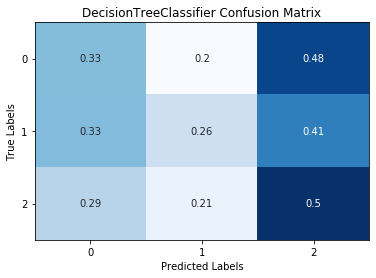

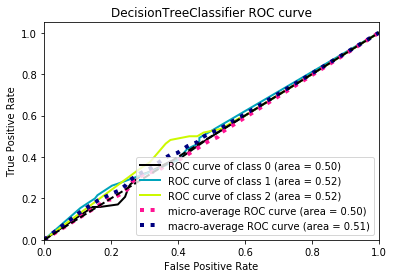


      BIOPHYSICAL       

Selecting model...

Model	Score
-------------
Random Forest: 0.4537 ± 0.0391
Gradient Boosting: 0.4398 ± 0.0485
Decision Tree: 0.4743 ± 0.0388
Extra Trees: 0.4567 ± 0.0337
Logistic Regression (SGD): 0.4788 ± 0.0516

The selected model is ('Logistic Regression (SGD)', 0.47877536847614116)

Starting training...

The best 10-fold cross valdiation score is 0.5262.
The best parameters are:
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=9999, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Training took 0m 43s.

Classification report
---------------------
              precision    recall  f1-score   support

           0       0.31      0.45      0

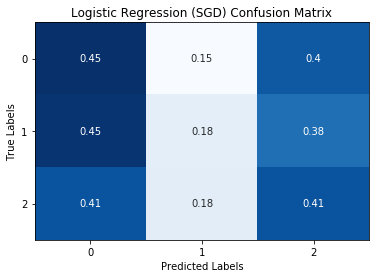

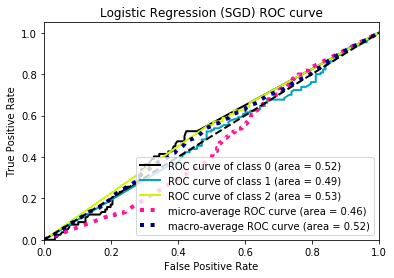


     HYDROPHOBICITY     

Selecting model...

Model	Score
-------------
Random Forest: 0.4315 ± 0.0451
Gradient Boosting: 0.4355 ± 0.0489
Decision Tree: 0.4853 ± 0.0242
Extra Trees: 0.4440 ± 0.0374
Logistic Regression (SGD): 0.4621 ± 0.0296

The selected model is ('Decision Tree', 0.4852871560735311)

Starting training...

The best 10-fold cross valdiation score is 0.5016.
The best parameters are:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=110, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9999, splitter='random')
Training took 0m 36s.

Classification report
---------------------
              precision    recall  f1-score   support

           0       0.31      0.48      0.38 

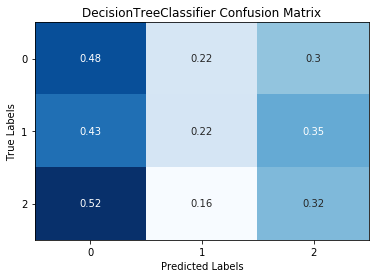

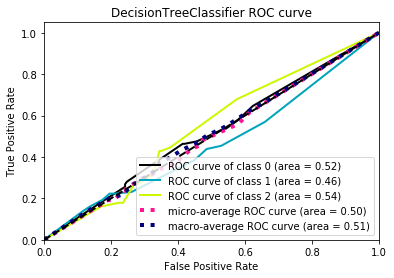


      ISOELECTRIC       

Selecting model...

Model	Score
-------------
Random Forest: 0.4518 ± 0.0471
Gradient Boosting: 0.4526 ± 0.0309
Decision Tree: 0.4834 ± 0.0404
Extra Trees: 0.4515 ± 0.0492
Logistic Regression (SGD): 0.4570 ± 0.0469

The selected model is ('Decision Tree', 0.48342301424920747)

Starting training...

The best 10-fold cross valdiation score is 0.5143.
The best parameters are:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=60, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9999, splitter='random')
Training took 1m 4s.

Classification report
---------------------
              precision    recall  f1-score   support

           0       0.29      0.32      0

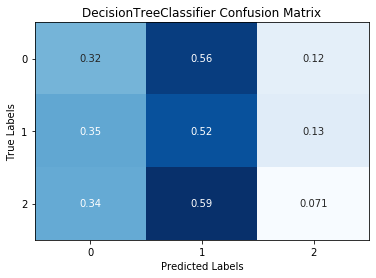

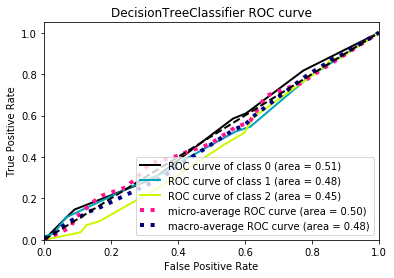


          SASA          

Selecting model...

Model	Score
-------------
Random Forest: 0.4358 ± 0.0540
Gradient Boosting: 0.4262 ± 0.0423
Decision Tree: 0.4718 ± 0.0350
Extra Trees: 0.4467 ± 0.0532
Logistic Regression (SGD): 0.4436 ± 0.0705

The selected model is ('Decision Tree', 0.47176264072257296)

Starting training...

The best 10-fold cross valdiation score is 0.5065.
The best parameters are:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9999, splitter='best')
Training took 3m 49s.

Classification report
---------------------
              precision    recall  f1-score   support

           0       0.34      0.45      0.39    

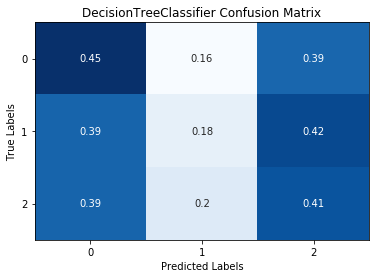

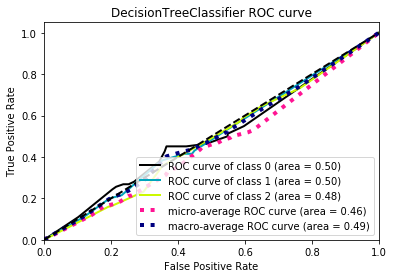


         VOLUME         

Selecting model...

Model	Score
-------------
Random Forest: 0.4298 ± 0.0589
Gradient Boosting: 0.4218 ± 0.0446
Decision Tree: 0.4833 ± 0.0313
Extra Trees: 0.4424 ± 0.0531
Logistic Regression (SGD): 0.4467 ± 0.0389

The selected model is ('Decision Tree', 0.48333294390813836)

Starting training...

The best 10-fold cross valdiation score is 0.5212.
The best parameters are:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9999, splitter='best')
Training took 5m 14s.

Classification report
---------------------
              precision    recall  f1-score   support

           0       0.31      0.49      0.

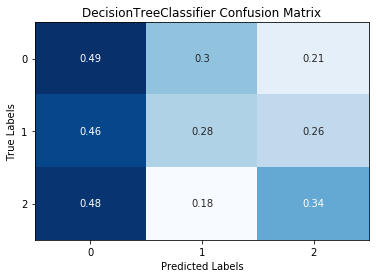

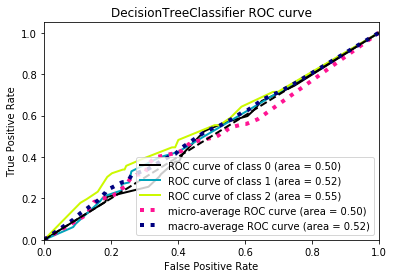


         WEIGHT         

Selecting model...

Model	Score
-------------
Random Forest: 0.4329 ± 0.0590
Gradient Boosting: 0.4145 ± 0.0396
Decision Tree: 0.4853 ± 0.0379
Extra Trees: 0.4413 ± 0.0481
Logistic Regression (SGD): 0.4488 ± 0.0653

The selected model is ('Decision Tree', 0.4852653879753202)

Starting training...


In [ ]:
# Test all the properties from the values Excel file
for prop, feature in zip(properties, feature_list):
    
    print()
    print('='*24)
    print(prop.center(24))
    print('='*24)

    tuned_clf, report, mcc, loss_score, feat_imp, conf_mat, roc_curve = classify(feature, 
                                                                                 labels_df['Labels'], # Specify column
                                                                                 resample_method = 'smote_enn',
                                                                                 model = 'all',
                                                                                 scoring = 'roc_auc_ovo',
                                                                                 cv = 10,
                                                                                 n_iter = 10)

    print('\nClassification report')
    print('---------------------')
    print(report)

    print('\nMatthew Correlation Coefficient: {:.4f}'.format(mcc))

    print('\nLog Loss: {:.4f}'.format(loss_score))
    
    print('\nFeature Importance')
    print('------------------')
    print(feat_imp)

    conf_mat
    plt.show()

    roc_curve
    plt.show()

### Saving the data
---

You can save `feature_list` to an Excel file with its corresponding sheet name from `sheet_names`. So Sheet1 will be named AA2INT and contains `feature_list[0]` and so forth.

```python
# To install this package, run pip3 install Xlsxwriter in your terminal
import xlsxwriter

writer = pd.ExcelWriter('name_of_file.xlsx', engine = 'xlsxwriter')

frames = dict(zip(properties, feature_list))

for prop, feature in frames.items():
    feature.to_excel(writer, sheet_name = sheet, engine = 'xlsxwriter')
writer.save()
```

In addition, the `parse_protparam()` function from the `data_transform` module reads in and parses a protparam file(a text file). 

An example:

```python
from cafe.data_transform import parse_protparam

protparam_df = parse_protparam('protparam.txt') # Returns a pandas dataframe

# Save protparam_df as a Excel sheet to the saved Excel file above
# To install this package, run pip3 install openpyxl in your terminal
import openpyxl

with pd.ExcelWriter('name_of_file.xlsx', engine = 'openpyxl', mode = 'a') as writer:
    protparam_df.to_excel(writer, sheet_name = 'PROTPARAM')
```

If you are interested in combining protparam with one of the properties (i.e. SASA, Volume, etc.), then first read in the Excel file and then concatenate the two dataframes:

```python
sasa_df = pd.read_excel('name_of_file.xlsx', sheet_name = 'SASA')
protparam_df = pd.read_excel('name_of_file.xlsx', sheet_name = 'PROTPARAM')

# Concatenate both dataframes
sasa_protparam = pd.concat([sasa_df, protparam_df], axis = 1) # Set axis = 1 for columns
```

#### That's it! Thank you for using `cafe` and I hope it helps you with your scientific research and purposes.

#### Feel free to make any improvements to this package (as well as proper citation). 